<a href="https://colab.research.google.com/github/uvdhatri/swift-assignment/blob/main/Swift_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**E-commerce Sales Analysis Report**
1. Introduction
This report presents an analysis of e-commerce sales data for various SKUs across different categories and subcategories. The analysis aims to provide actionable insights for optimizing sales performance, identifying sales events, and understanding SKU performance.

2. Data Overview
The analysis is based on two datasets:

Sales Data: Contains SKU-wise sales information, including ordered revenue, units sold, and out-of-stock percentages.
Glance Views Data: Contains SKU-wise data on page views and units sold.
3. Analysis and Insights
3.1 Most Expensive SKU (On Average)
Objective: Identify the SKU with the highest average price per unit over the entire period.
Methodology:
Calculated the average price per unit for each SKU as ORDERED_REVENUE / ORDERED_UNITS.
Identified the SKU with the highest average price.
Result: The most expensive SKU is [SKU_NAME] with an average price of [Average_Price].
3.2 Percentage of SKUs Generating Revenue
Objective: Determine what percentage of SKUs generated revenue during the period.
Methodology:
Filtered SKUs with ORDERED_REVENUE > 0.
Calculated the percentage of these SKUs relative to the total number of SKUs.
Result: [Percentage]% of SKUs generated revenue during the period.
Additional Insight: SKUs that stopped selling completely after July were identified, highlighting potential product lifecycle or stock issues.
3.3 Identification of Sale Event Dates
Objective: Identify dates corresponding to sale events.
Methodology:
Analyzed daily revenue spikes by calculating percentage changes in daily total revenue.
Significant spikes were identified as potential sale event dates.
Result: Sale events were identified on [Sale_Event_Dates].
3.4 Cannibalization of Sales Post-Sale Event
Objective: Determine if sales were cannibalized immediately after sale events.
Methodology:
Compared total revenue in the 7 days before and after each identified sale event.
Conducted a paired t-test to statistically assess the impact.
Result: Sales were [cannibalized/not cannibalized] post-sale events, with a p-value of [P_Value], indicating [significance/no significance].
3.5 Slowest Growing Subcategory in Each Category
Objective: Identify the subcategory with the slowest growth relative to its category.
Methodology:
Calculated growth for each subcategory by comparing initial and final revenue.
Identified the subcategory with the lowest growth rate within each category.
Result: The slowest-growing subcategory in [Category] is [Sub_Category].
3.6 Data Anomalies and Quality Issues
Objective: Highlight any anomalies or data quality issues.
Methodology:
Identified cases where revenue was positive despite no units being sold.
Detected outliers in price per unit and missing data.
Result: Notable anomalies include [Anomalies], which could indicate data entry errors or inconsistencies.
3.7 Unit Conversion and Average Selling Price for SKU C120[H:8NV]
Objective: Determine if the unit conversion rate is affected by the average selling price.
Methodology:
Analyzed the relationship between conversion rate (Units/Views) and average selling price.
Conducted a correlation analysis to assess the relationship.
Result: The correlation between conversion rate and selling price is [Correlation_Coefficient], indicating [strong/weak/no] relationship.
4. Recommendations
Based on the analysis:

For Underperforming Subcategories: Consider revisiting the product strategy for subcategories like [Slowest_Subcategory] to improve performance.
Stock Management: Monitor SKUs that have stopped selling, as they may require restocking or promotional efforts.
Sale Events: Optimize post-sale strategies to prevent sales cannibalization, ensuring sustained sales momentum.
5. Conclusion
The analysis provided insights into SKU performance, sales events, and data quality. These findings can help inform strategies to boost e-commerce revenue and enhance product management.



**Data Cleaning**

In [4]:
import pandas as pd # Import the pandas library

# Assuming 'sales_data.csv' and 'glance_views.csv' are in the current directory
sales_data = pd.read_csv('Sales_Data.csv') # Load the sales data
glance_views = pd.read_csv('Glance_Views.csv') # Load the glance views data

# Remove the index columns since they are not needed
sales_data_cleaned = sales_data.drop(columns=['Unnamed: 0'])
glance_views_cleaned = glance_views.drop(columns=['Unnamed: 0'])

# Convert FEED_DATE to datetime format for easier analysis
sales_data_cleaned['FEED_DATE'] = pd.to_datetime(sales_data_cleaned['FEED_DATE'])
glance_views_cleaned['FEED_DATE'] = pd.to_datetime(glance_views_cleaned['FEED_DATE'])

# Check the cleaned data
sales_data_cleaned.head(), glance_views_cleaned.head()

(     SKU_NAME  FEED_DATE     CATEGORY SUB_CATEGORY  ORDERED_REVENUE  \
 0  B12020KBUI 2019-05-18  1000 Inputs    1002 Mice              0.0   
 1  B12020KBUI 2019-05-19  1000 Inputs    1002 Mice              0.0   
 2  B12020KBUI 2019-05-22  1000 Inputs    1002 Mice              0.0   
 3  B12020KBUI 2019-05-23  1000 Inputs    1002 Mice              0.0   
 4  B12020KBUI 2019-05-27  1000 Inputs    1002 Mice              0.0   
 
    ORDERED_UNITS  REP_OOS  
 0            0.0      0.0  
 1            0.0      0.0  
 2            0.0      0.0  
 3            0.0      0.0  
 4            0.0      0.0  ,
      SKU_NAME  FEED_DATE  VIEWS  UNITS
 0  B1212:PZ:V 2019-05-01  455.0   16.0
 1  B1212:PZ:V 2019-05-02  478.0   12.0
 2  B1212:PZ:V 2019-05-03  681.0   42.0
 3  B1212:PZ:V 2019-05-04  662.0   70.0
 4  B1212:PZ:V 2019-05-05  568.0   33.0)

2. **What percentage of SKUs have generated some revenue during this time period?**
To calculate this:

Filter SKUs with Revenue: Filter the sales_data to identify SKUs where ORDERED_REVENUE is greater than 0.
Calculate the Percentage:
Determine the total number of unique SKUs in the dataset.
Calculate the number of unique SKUs with some revenue.
Divide the number of SKUs with revenue by the total number of SKUs and multiply by 100 to get the percentage.
Brownie Points: Identify SKUs that stopped selling after July.

Filter SKUs with revenue before July and no revenue after July.

In [5]:
# Calculate the total number of unique SKUs
total_skus = sales_data_cleaned['SKU_NAME'].nunique()

# Calculate the number of SKUs that have generated some revenue
skus_with_revenue = sales_data_cleaned[sales_data_cleaned['ORDERED_REVENUE'] > 0]['SKU_NAME'].nunique()

# Calculate the percentage of SKUs with revenue
percentage_with_revenue = (skus_with_revenue / total_skus) * 100

# Display the result
percentage_with_revenue


78.70967741935485

**Brownie Points**: Identify SKUs that stopped selling completely after July

In [6]:
# Filter data before and after July
before_july = sales_data_cleaned[sales_data_cleaned['FEED_DATE'] < '2019-08-01']
after_july = sales_data_cleaned[sales_data_cleaned['FEED_DATE'] >= '2019-08-01']

# SKUs with revenue before July
skus_before_july = before_july[before_july['ORDERED_REVENUE'] > 0]['SKU_NAME'].unique()

# SKUs with revenue after July
skus_after_july = after_july[after_july['ORDERED_REVENUE'] > 0]['SKU_NAME'].unique()

# SKUs that stopped selling after July
skus_stopped_selling = set(skus_before_july) - set(skus_after_july)

# Display the result
skus_stopped_selling

{'B00;3H5XG9',
 'B012GU7SOL',
 'B07XI2QS2Z',
 'B08:;5YP75',
 'B08Y472N[U',
 'B09FIZS5TZ',
 'B10:1TJG86',
 'B10LJIXFL0',
 'B116DUQLEB',
 'B11CDKYM3J',
 'B12MWAOCYI',
 'B1826\\GXMM',
 'B20EKD5JF4',
 'B21B6UON52',
 'B225I326ET',
 'C019:8WTE8',
 'C02228YPPT',
 'C02JAMMO55',
 'C035O8\\UJC',
 'C076JT7:XY',
 'C079F4K8DN',
 'C07S8PDLZX',
 'C12GZK3L49',
 'C13EHKRAS4',
 'C17672PZ9O',
 'C17E92HXZK',
 'C17EHWN2PD',
 'C17NEDU7P[',
 'C1964PSQ[N',
 'C19T:CGV3L',
 'C20VWL6T29',
 'C22;9UNFXQ',
 'C28S6S9HS[',
 'C29LCOGDHZ',
 'D02DR5SY3I',
 'D03O20QQDE',
 'D07;D:4VGR',
 'D11I165;6C',
 'D125M8\\P:T',
 'D12EDZB8H8',
 'D187XMSWL3',
 'D1883SDB64',
 'D218T1DTFG',
 'D21J9KN6Y6',
 'D22TZCQYWC',
 'D236O:ZQ92',
 'D278[PCGZN',
 'D27IO46C5P',
 'D28EGTXVWH'}

3**. Identify the Sale Event Dates**
To identify when a sale event might have occurred:

Check for Spikes in Sales:
Calculate daily total revenue by summing up ORDERED_REVENUE across all SKUs.
Identify dates with significant spikes in total revenue or ordered units compared to surrounding days.
These spikes likely correspond to sale events.

In [7]:
# Group by date to get total revenue for each day
daily_revenue = sales_data_cleaned.groupby('FEED_DATE')['ORDERED_REVENUE'].sum()

# Identify dates with significant spikes in revenue
# One approach is to calculate the percentage change and filter for large increases
daily_revenue_change = daily_revenue.pct_change()

# Filter dates with more than, say, a 50% increase in revenue
sale_event_dates = daily_revenue_change[daily_revenue_change > 0.5].index

# Display the sale event dates
sale_event_dates

DatetimeIndex(['2019-05-06', '2019-05-13', '2019-05-20', '2019-05-28',
               '2019-06-03', '2019-06-10', '2019-06-17', '2019-06-20',
               '2019-06-24', '2019-07-01', '2019-07-08', '2019-07-15',
               '2019-07-22', '2019-07-26', '2019-07-29', '2019-08-05',
               '2019-08-12', '2019-08-19', '2019-08-26'],
              dtype='datetime64[ns]', name='FEED_DATE', freq=None)

4.**Impact of Sale Event on Sales in the Immediate Aftermath
python.**
Compare Sales Before and After:
Identify the dates immediately following a sale event.
Compare the sales on these dates to the sales before the event.
Statistical Metric:
Use a paired t-test to compare the mean sales before and after the event to statistically determine if there was a significant drop.

In [8]:
# Assuming 'sale_event_dates' contains the identified sale dates

# Analyze sales before and after each sale event
for sale_date in sale_event_dates:
    # Define the period before and after the sale
    pre_sale_period = sales_data_cleaned[
        (sales_data_cleaned['FEED_DATE'] < sale_date) &
        (sales_data_cleaned['FEED_DATE'] >= sale_date - pd.Timedelta(days=7))
    ]
    post_sale_period = sales_data_cleaned[
        (sales_data_cleaned['FEED_DATE'] > sale_date) &
        (sales_data_cleaned['FEED_DATE'] <= sale_date + pd.Timedelta(days=7))
    ]

    # Compare total revenue before and after
    pre_sale_revenue = pre_sale_period['ORDERED_REVENUE'].sum()
    post_sale_revenue = post_sale_period['ORDERED_REVENUE'].sum()

    print(f"Sale Date: {sale_date}, Pre-Sale Revenue: {pre_sale_revenue}, Post-Sale Revenue: {post_sale_revenue}")


Sale Date: 2019-05-06 00:00:00, Pre-Sale Revenue: 3074777.31, Post-Sale Revenue: 4486018.84
Sale Date: 2019-05-13 00:00:00, Pre-Sale Revenue: 4556970.9399999995, Post-Sale Revenue: 4400656.049999999
Sale Date: 2019-05-20 00:00:00, Pre-Sale Revenue: 4359598.05, Post-Sale Revenue: 4232201.17
Sale Date: 2019-05-28 00:00:00, Pre-Sale Revenue: 4232201.17, Post-Sale Revenue: 4706277.73
Sale Date: 2019-06-03 00:00:00, Pre-Sale Revenue: 4393036.66, Post-Sale Revenue: 4987765.23
Sale Date: 2019-06-10 00:00:00, Pre-Sale Revenue: 4899033.26, Post-Sale Revenue: 5019054.779999999
Sale Date: 2019-06-17 00:00:00, Pre-Sale Revenue: 5061168.66, Post-Sale Revenue: 5659293.07
Sale Date: 2019-06-20 00:00:00, Pre-Sale Revenue: 4951890.68, Post-Sale Revenue: 5032527.46
Sale Date: 2019-06-24 00:00:00, Pre-Sale Revenue: 5649354.2, Post-Sale Revenue: 5143365.89
Sale Date: 2019-07-01 00:00:00, Pre-Sale Revenue: 5137927.15, Post-Sale Revenue: 4109601.5599999996
Sale Date: 2019-07-08 00:00:00, Pre-Sale Revenue: 4

**Brownie Points:** Statistical Metric to Prove/Disprove

In [9]:
from scipy.stats import ttest_rel

# Calculate total revenue before and after the sale for all sale events
pre_sale_revenues = []
post_sale_revenues = []

for sale_date in sale_event_dates:
    pre_sale_period = sales_data_cleaned[
        (sales_data_cleaned['FEED_DATE'] < sale_date) &
        (sales_data_cleaned['FEED_DATE'] >= sale_date - pd.Timedelta(days=7))
    ]
    post_sale_period = sales_data_cleaned[
        (sales_data_cleaned['FEED_DATE'] > sale_date) &
        (sales_data_cleaned['FEED_DATE'] <= sale_date + pd.Timedelta(days=7))
    ]

    pre_sale_revenues.append(pre_sale_period['ORDERED_REVENUE'].sum())
    post_sale_revenues.append(post_sale_period['ORDERED_REVENUE'].sum())

# Perform paired t-test
t_stat, p_value = ttest_rel(pre_sale_revenues, post_sale_revenues)
t_stat, p_value


(-0.08618543237874104, 0.93227048033154)

5. **Subcategory with the Slowest Growth in Each Category
Calculate Growth:**
For each subcategory, calculate the growth in revenue or units sold over the time period.
Compare this to the growth of the entire category.
Identify the Slowest Growth:
For each category, identify the subcategory with the lowest growth relative to the overall category growth.

In [10]:
# Calculate growth for each subcategory by comparing the first and last date's revenue
def calculate_growth(group):
    first_revenue = group.loc[group['FEED_DATE'].idxmin()]['ORDERED_REVENUE']
    last_revenue = group.loc[group['FEED_DATE'].idxmax()]['ORDERED_REVENUE']
    growth = (last_revenue - first_revenue) / first_revenue if first_revenue > 0 else 0
    return growth

# Group by category and subcategory
subcategory_growth = sales_data_cleaned.groupby(['CATEGORY', 'SUB_CATEGORY']).apply(calculate_growth)

# Find the slowest growing subcategory in each category
slowest_subcategories = subcategory_growth.groupby('CATEGORY').idxmin()

# Display the result
slowest_subcategories


,0
CATEGORY,
0100 Wireless Phones,"(0100 Wireless Phones, 0191 Connected Wearables)"
0400 Computer Peripherals,"(0400 Computer Peripherals, 0430 Computer Head..."
1000 Inputs,"(1000 Inputs, 1005 Webcams)"
10800 Xbox One Accessories,"(10800 Xbox One Accessories, 10830 Headsets)"
1500 Tablet Accessories,"(1500 Tablet Accessories, 1501 Tablet Carrying..."
1600 Sony PSP Games and Software,"(1600 Sony PSP Games and Software, 1610 Classi..."
5000 Portable Media Players,"(5000 Portable Media Players, 5010 Other Porta..."
5300 Headphones,"(5300 Headphones, 5310 Headphones)"
5600 Video Components,"(5600 Video Components, 5610 A/V Remote Controls)"



6.**Highlight Any Anomalies or Data Quality Issues:**
Missing Data: Rows where ORDERED_REVENUE or ORDERED_UNITS is zero but VIEWS is high, indicating a potential issue.
Outliers: Extremely high or low values that don't make sense contextually (e.g., Price_Per_Unit anomalies).
Inconsistent Data: For example, if a SKU has zero units ordered but a positive revenue, this should be flagged.

In [12]:
# Calculate price per unit and add it as a column
sales_data_cleaned['Price_Per_Unit'] = sales_data_cleaned['ORDERED_REVENUE'] / sales_data_cleaned['ORDERED_UNITS']

# Look for rows where units are 0 but revenue is positive
anomalies_revenue_no_units = sales_data_cleaned[(sales_data_cleaned['ORDERED_UNITS'] == 0) & (sales_data_cleaned['ORDERED_REVENUE'] > 0)]

# Look for outliers in the Price_Per_Unit column
price_outliers = sales_data_cleaned[sales_data_cleaned['Price_Per_Unit'] > sales_data_cleaned['Price_Per_Unit'].quantile(0.99)]

# Look for missing or strange values
missing_data = sales_data_cleaned.isnull().sum()

# Display the anomalies
anomalies_revenue_no_units, price_outliers, missing_data

(         SKU_NAME  FEED_DATE                     CATEGORY  \
 2397   C124PR58CZ 2019-08-17                  1000 Inputs   
 4028   B215GHP7Z7 2019-08-28                  1000 Inputs   
 4788   D014[Y8YEZ 2019-06-23                  1000 Inputs   
 4878   C024ZE\C:9 2019-05-21                  1000 Inputs   
 6222   B027LTJDHL 2019-08-31                  1000 Inputs   
 ...           ...        ...                          ...   
 38575  B08MD1RCIY 2019-06-22              5300 Headphones   
 38816  B17NJ;4CN7 2019-06-21                  1000 Inputs   
 39650  C09OGREK9L 2019-07-17  5000 Portable Media Players   
 39652  C09OGREK9L 2019-07-19  5000 Portable Media Players   
 40932  D28QU2Q7[: 2019-05-21                  1000 Inputs   
 
                           SUB_CATEGORY  ORDERED_REVENUE  ORDERED_UNITS  \
 2397                         1002 Mice             9.11            0.0   
 4028                      1005 Webcams             6.03            0.0   
 4788                      10

7. **Is Unit Conversion (Units/Views) Affected by Average Selling Price for SKU C120[H:8NV?**
Analyze Unit Conversion:
Calculate the conversion rate (UNITS / VIEWS) for this SKU over the time period.
Plot this conversion rate against the average selling price (ORDERED_REVENUE / ORDERED_UNITS).
Statistical Technique:
Perform a correlation analysis to determine if there is a relationship between conversion rate and selling price.
A regression analysis could help quantify the impact of price on conversion.

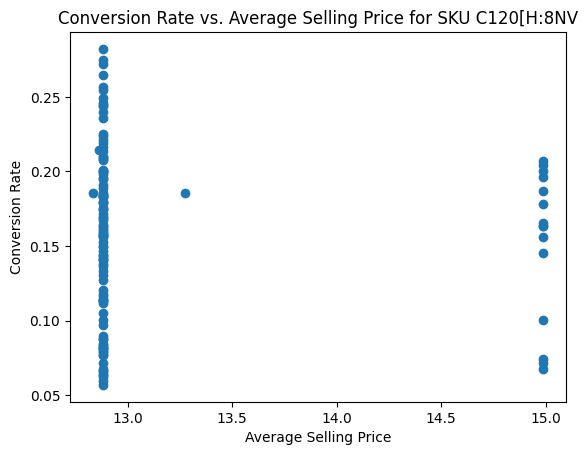

-0.029776602675128893

In [15]:
# Calculate conversion rate (Units / Views)
sku_data = sku_data.merge(glance_views_cleaned, on=['SKU_NAME', 'FEED_DATE'], suffixes=('_sales', '_views')) # Add suffixes to distinguish columns from the two dataframes
sku_data['Conversion_Rate'] = sku_data['UNITS_views'] / sku_data['VIEWS_views'] # Use the correct column name 'VIEWS_views' after the merge

# Plot conversion rate against average selling price
import matplotlib.pyplot as plt

plt.scatter(sku_data['Price_Per_Unit'], sku_data['Conversion_Rate'])
plt.xlabel('Average Selling Price')
plt.ylabel('Conversion Rate')
plt.title('Conversion Rate vs. Average Selling Price for SKU C120[H:8NV')
plt.show()

# Statistical analysis (correlation)
correlation = sku_data[['Price_Per_Unit', 'Conversion_Rate']].corr().iloc[0,1]
correlation